In [1]:
# this notebook needs to be run in a pymc3 environment.  

<Figure size 1440x864 with 0 Axes>

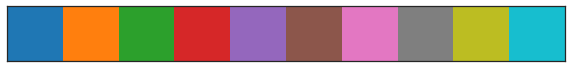

<Figure size 1440x864 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
sns.set_style('white')

import pymc3 as pm

current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.figure(figsize=(20,12))
# sns.palplot(sns.color_palette("bright", 10))
# plt.show()





In [3]:
# print(plt.style.available)

In [4]:
# mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [5]:
# !pip install openpyxl

In [6]:
df = pd.read_excel('CFD_NFIRS_1_1_17to_6_25_21.xlsx')

In [7]:
df

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Use,Basic Property Use Code And Description,Basic Shift Or Platoon,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses
0,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,1 or 2 family dwelling,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN
1,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,1 or 2 family dwelling,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN
2,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:14:27,1,NaN,8.87,2016-12-31 20:08:52,...,1 or 2 family dwelling,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN
3,2016-00006845,2017-01-01,20,Provide manpower,NaN,2016-12-31 20:17:22,2,NaN,NaN,2016-12-31 20:08:52,...,1 or 2 family dwelling,419 - 1 or 2 family dwelling,"""A"" Shift",NaN,0,0,NaN,NaN,NaN,NaN
4,2017-00000006,2017-01-01,1,Hazardous materials spill control and confinement,NaN,2017-01-01 01:50:46,1,NaN,10.50,2017-01-01 01:44:36,...,"Residential street, road or residential driveway","962 - Residential street, road or residential ...","""A"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107723,2021-00005152,2021-06-25,19,Investigate,NaN,2021-06-25 19:27:28,2,NaN,4.73,2021-06-25 19:23:11,...,Hospital - medical or psychiatric,331 - Hospital - medical or psychiatric,"""C"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN
107724,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,Multifamily dwelling,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN
107725,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,Multifamily dwelling,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN
107726,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,Multifamily dwelling,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['Incident Number', 'Incident Date', 'Basic Incident Hour Of Day 24',
       'Incident Primary Action Taken',
       'Apparatus Resource Actions Taken Code And Description 1',
       'Apparatus Resource Arrival Date Time',
       'Apparatus Resource Arrival Sequence Number By Overall Incident',
       'Apparatus Resource On Scene Time in Minutes',
       'Apparatus Resource Arrived To In Service In Minutes',
       'Apparatus Resource Dispatch Date Time',
       'Incident Alarm Handling Time In Minutes',
       'Apparatus Resource Turnout Time In Minutes',
       'Apparatus Resource En Route To Arrived In Minutes',
       'Total Response Time', 'Apparatus Resource En Route Date Time',
       'Apparatus Resource ID',
       'Apparatus Resource Primary Action Taken Code And Description',
       'Apparatus Resource Type',
       'Incident First Unit Arrived Apparatus Resource ID',
       'Apparatus Personnel Full Name', 'Apparatus Personnel Role',
       'Apparatus Resource Actions 

In [9]:
df['Apparatus Resource ID'].head(20)

0       E10
1       E10
2       E10
3     RS144
4        E3
5        E3
6        E3
7        E3
8        E7
9        E7
10       E7
11       E2
12       E2
13       E2
14       E2
15    RS145
16       E3
17       E3
18       E3
19     TRK8
Name: Apparatus Resource ID, dtype: object

In [10]:
apparatus_usage = df['Apparatus Resource ID'].value_counts()
apparatus_usage

E7         19051
E5         16878
E1         12590
E10        11276
TRK9        8398
RSFM10      6244
TO10        5504
RSFM1       4762
TRK8        2414
RS140       2241
RS145       2086
RS146       1793
E2          1686
RS143       1530
BC1         1492
E4          1478
E3          1404
A01         1163
RS142        995
RS144        984
RS147        901
RS141        849
DUTY1        830
BC6          444
BC2          207
FM4           78
FM2           62
BC3           62
RES1          54
OPS2          53
FM3           37
SQ10          37
CHF1          33
HM01          22
SQ135         16
SQ133         15
FM1           12
Truck 9        9
SQ134          7
CHF3           7
ISU1           4
E111           4
GAT1           4
E82            3
UVA2           3
FM10           2
RSFM2          2
E83            1
FM6            1
Name: Apparatus Resource ID, dtype: int64

In [11]:
high_use_apparatus = apparatus_usage[apparatus_usage > 1000]
high_use_apparatus = high_use_apparatus.to_frame().reset_index()
high_use_apparatus.rename(columns = {'Apparatus Resource ID' : 'Apparatus Usage', 'index' : 'Apparatus Resource ID'}, inplace = True)
high_use_apparatus

,Apparatus Resource ID,Apparatus Usage
0,E7,19051
1,E5,16878
2,E1,12590
3,E10,11276
4,TRK9,8398
5,RSFM10,6244
6,TO10,5504
7,RSFM1,4762
8,TRK8,2414
9,RS140,2241


<function matplotlib.pyplot.show(close=None, block=None)>

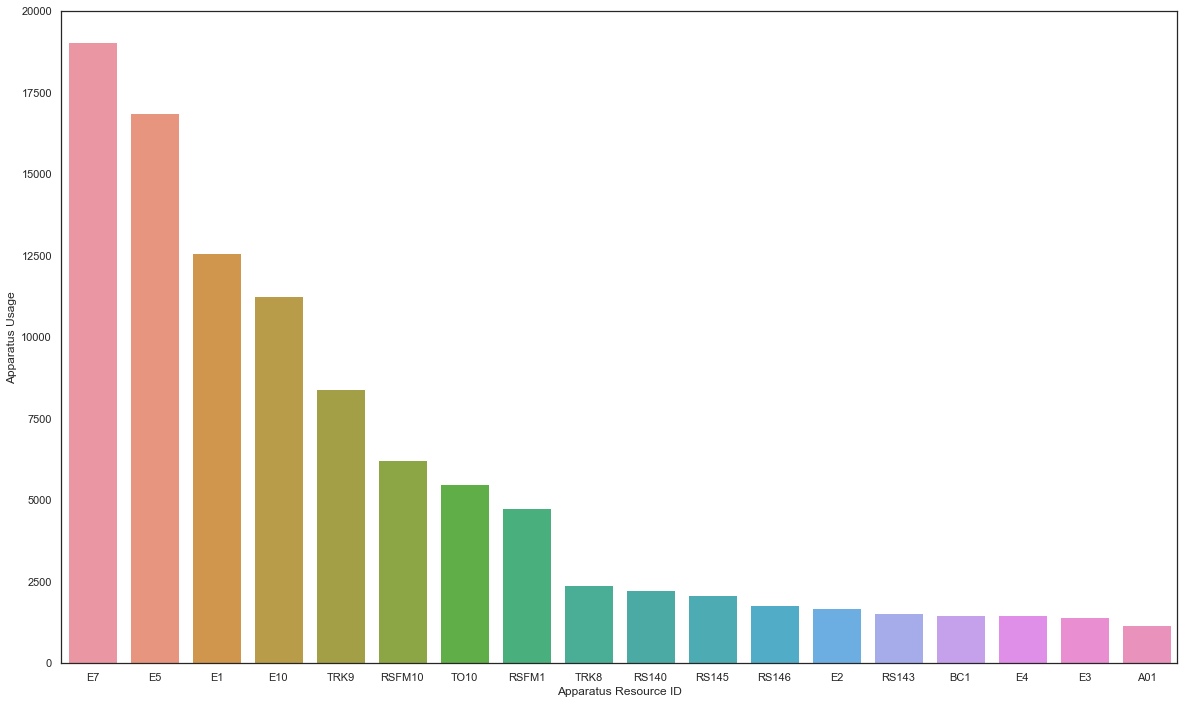

In [12]:
plt.figure(figsize=(20,12))
# sns.set(style="ticks")

sns.barplot(data = high_use_apparatus, x = 'Apparatus Resource ID', y = 'Apparatus Usage')

plt.show

In this data set the primary usage is from the four Engines of CFD as can be seen from this data, Engines are the primary vehicle of the department response.

![CFD Engine Response Districts](EngineZone.jpg)

A brief overview from https://firefighternow.com/fire-engine-vs-fire-truck/
Fire engines and fire trucks are different in the following ways:
* Fire engines usually get to the scene before fire trucks 
* Fire engines are used for putting out fires while fire trucks are for victim rescue, roof ventilation, and controlling the fire should it grow larger
* Fire engines include equipment like hoses, pumps and water tanks (which is why they’re sometimes called pumpers)
* Fire trucks have ventilation and rescue equipment and an assortment of hydraulic aerial ladders

An overview of apparatus costs

![Example Apparatus Costs](truck_cost.jpg)


For this project we will focus only on the CFD Engine Data

In [13]:
# The Engines are the top 4 resources in CFD
df['Apparatus Resource ID'].value_counts().head(4)

E7     19051
E5     16878
E1     12590
E10    11276
Name: Apparatus Resource ID, dtype: int64

In [14]:
# count our records
df['Apparatus Resource ID'].value_counts().head(4).sum()

59795

In [15]:
#check data type
df['Apparatus Resource ID'].dtype

dtype('O')

In [16]:
#flip it to string
df['Apparatus Resource ID'] = df['Apparatus Resource ID'].astype('string')

In [17]:
df['Apparatus Resource ID'].dtype

string[python]

In [18]:
# subset using ID.  I can't get it to subset using or statement |
df[df['Apparatus Resource ID'] == 'E7']

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Use,Basic Property Use Code And Description,Basic Shift Or Platoon,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses
8,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Restaurant or cafeteria,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN
9,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Restaurant or cafeteria,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN
10,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Restaurant or cafeteria,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN
29,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,"Street, other","960 - Street, other","""C"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN
30,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,"Street, other","960 - Street, other","""C"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107719,2021-00005152,2021-06-25,19,Investigate,NaN,2021-06-25 19:27:03,1,NaN,9.72,2021-06-25 19:23:11,...,Hospital - medical or psychiatric,331 - Hospital - medical or psychiatric,"""C"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN
107720,2021-00005152,2021-06-25,19,Investigate,NaN,2021-06-25 19:27:03,1,NaN,9.72,2021-06-25 19:23:11,...,Hospital - medical or psychiatric,331 - Hospital - medical or psychiatric,"""C"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN
107724,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,Multifamily dwelling,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN
107725,2021-00005155,2021-06-25,20,Investigate,NaN,2021-06-25 20:45:34,1,NaN,6.25,2021-06-25 20:43:19,...,Multifamily dwelling,429 - Multifamily dwelling,"""C"" Shift",PZ 5,0,0,NaN,NaN,NaN,NaN


In [19]:
# write a list to make a loop for subsetting
e_list = ['E7', 'E5','E1','E10']
e_list

['E7', 'E5', 'E1', 'E10']

In [20]:
for e in e_list:
    print (e)

E7
E5
E1
E10


In [21]:
#set an empty df
df_engine = pd.DataFrame()


In [22]:
# index through list, subset on equipment id, join together in new df

for e in e_list:
           
    temp_df = df[df['Apparatus Resource ID'] == e]
    
    df_engine = df_engine.append(temp_df, ignore_index=True)

In [23]:
df_engine

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Use,Basic Property Use Code And Description,Basic Shift Or Platoon,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses
0,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Restaurant or cafeteria,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN
1,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Restaurant or cafeteria,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN
2,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Restaurant or cafeteria,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN
3,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,"Street, other","960 - Street, other","""C"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN
4,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,"Street, other","960 - Street, other","""C"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59790,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,"Adult education center, college classroom","241 - Adult education center, college classroom","""B"" Shift",N-6,0,0,NaN,NaN,NaN,NaN
59791,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,"Adult education center, college classroom","241 - Adult education center, college classroom","""B"" Shift",N-6,0,0,NaN,NaN,NaN,NaN
59792,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,"Street, other","960 - Street, other","""B"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN
59793,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,"Street, other","960 - Street, other","""B"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN


In [24]:
# set an index for each engine
def eng_index(x):
    if x == 'E7':
        return '0'
    elif x == 'E5':
        return '1'
    elif x == 'E1':
        return '2'
    elif x == 'E10':
        return '3'    
    return


In [25]:
df_engine['engine_index'] = df_engine['Apparatus Resource ID'].apply(eng_index)

In [26]:
df_engine

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Property Use Code And Description,Basic Shift Or Platoon,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,engine_index
0,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN,0
1,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN,0
2,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,161 - Restaurant or cafeteria,"""A"" Shift",Lewis Mtn,0,0,NaN,NaN,NaN,NaN,0
3,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,"960 - Street, other","""C"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN,0
4,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,"960 - Street, other","""C"" Shift",Fifeville,0,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59790,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,"241 - Adult education center, college classroom","""B"" Shift",N-6,0,0,NaN,NaN,NaN,NaN,3
59791,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,"241 - Adult education center, college classroom","""B"" Shift",N-6,0,0,NaN,NaN,NaN,NaN,3
59792,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,"960 - Street, other","""B"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN,3
59793,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,"960 - Street, other","""B"" Shift",PZ 10,0,0,NaN,NaN,NaN,NaN,3


<function matplotlib.pyplot.show(close=None, block=None)>

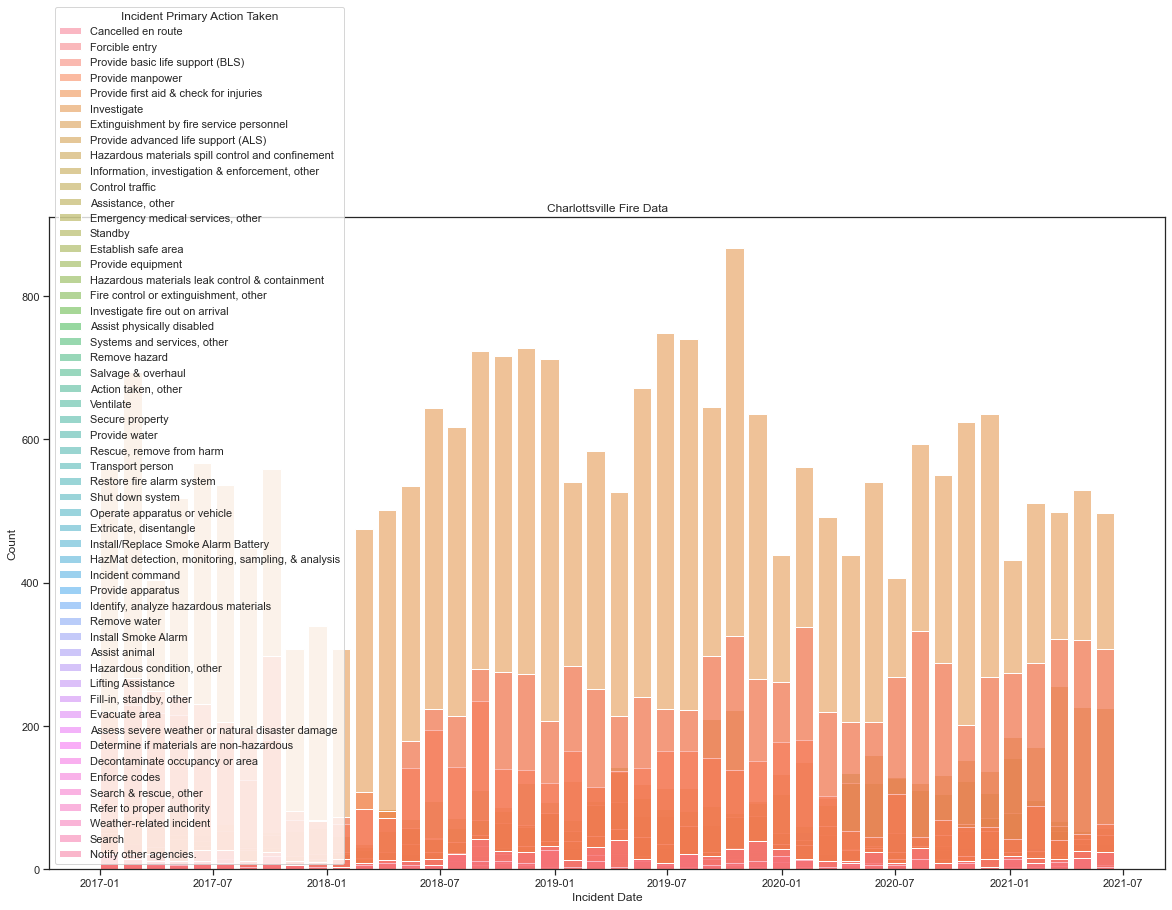

In [28]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

sns.histplot(data=df_engine, x='Incident Date', hue='Incident Primary Action Taken', shrink=.8).set(title = "Charlottsville Fire Data") #bins = years, hue="FireType", 

plt.show
#plt.savefig('CFD_Year_Plot.png')

In [29]:
# df['date2'] = pd.to_datetime(df['Incident Date'],format='%Y%m%d')
df_engine['year'] = pd.DatetimeIndex(df_engine['Incident Date']).year
df_engine['month'] = pd.DatetimeIndex(df_engine['Incident Date']).month

In [30]:
df_engine

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,engine_index,year,month
0,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Lewis Mtn,0,0,NaN,NaN,NaN,NaN,0,2017,1
1,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Lewis Mtn,0,0,NaN,NaN,NaN,NaN,0,2017,1
2,2017-00000007,2017-01-01,1,Cancelled en route,NaN,2017-01-01 01:49:42,2,NaN,3.78,2017-01-01 01:46:03,...,Lewis Mtn,0,0,NaN,NaN,NaN,NaN,0,2017,1
3,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
4,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59790,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59791,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59792,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6
59793,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6


In [31]:
df_engine[['year', 'Incident Primary Action Taken']].value_counts(['year', 'Incident Primary Action Taken']).to_frame()



,,0
year,Incident Primary Action Taken,
2019,Investigate,6415
2018,Investigate,5817
2020,Investigate,5208
2017,Investigate,4819
2020,Provide basic life support (BLS),2578
...,...,...
2019,Enforce codes,3
2021,Enforce codes,3
2020,Notify other agencies.,3


In [32]:
df_engine['Incident Primary Action Taken'].unique()

array(['Cancelled en route', 'Forcible entry',
       'Provide basic life support (BLS)', 'Provide manpower',
       'Provide first aid & check for injuries', 'Investigate',
       'Extinguishment by fire service personnel',
       'Provide advanced life support (ALS)',
       'Hazardous materials spill control and confinement', nan,
       'Information, investigation & enforcement, other',
       'Control traffic', 'Assistance, other',
       'Emergency medical services, other', 'Standby',
       'Establish safe area', 'Provide equipment',
       'Hazardous materials leak control & containment',
       'Fire control or extinguishment, other',
       'Investigate fire out on arrival', 'Assist physically disabled',
       'Systems and services, other', 'Remove hazard',
       'Salvage & overhaul', 'Action taken, other', 'Ventilate',
       'Secure property', 'Provide water', 'Rescue, remove from harm',
       'Transport person', 'Restore fire alarm system',
       'Shut down system', 'O

In [33]:
df_engine.groupby(['Incident Primary Action Taken']).size().sort_values(ascending = False)

Incident Primary Action Taken
Investigate                                           24590
Provide basic life support (BLS)                      10336
Provide manpower                                       5538
Provide advanced life support (ALS)                    4503
Standby                                                3544
Assistance, other                                      2252
Extinguishment by fire service personnel               1684
Cancelled en route                                      787
Emergency medical services, other                       658
Lifting Assistance                                      611
Forcible entry                                          530
Transport person                                        425
Ventilate                                               378
Provide first aid & check for injuries                  354
Assist physically disabled                              326
Fire control or extinguishment, other                   325
Establish 

Most of these look useful, but lets remove the records for "cancled in route" as the engine will have never arrived on scene

In [34]:
# Drop row on condition from https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

df_engine = df_engine.drop(df_engine[df_engine['Incident Primary Action Taken'] == 'Cancelled en route'].index)
df_engine

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,engine_index,year,month
3,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
4,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
5,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
6,2017-00000021,2017-01-01,13,Provide basic life support (BLS),NaN,2017-01-01 13:19:56,1,NaN,9.27,2017-01-01 13:17:01,...,NaN,0,0,NaN,NaN,NaN,NaN,0,2017,1
7,2017-00000021,2017-01-01,13,Provide basic life support (BLS),NaN,2017-01-01 13:19:56,1,NaN,9.27,2017-01-01 13:17:01,...,NaN,0,0,NaN,NaN,NaN,NaN,0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59790,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59791,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59792,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6
59793,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6


Also what if the Engine was not the first on the scene?  Lets remove those too.

In [35]:
df_engine = df_engine.drop(df_engine[df_engine['Apparatus Resource Arrival Sequence Number By Overall Incident'] != 1].index)
df_engine

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,engine_index,year,month
3,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
4,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
5,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
6,2017-00000021,2017-01-01,13,Provide basic life support (BLS),NaN,2017-01-01 13:19:56,1,NaN,9.27,2017-01-01 13:17:01,...,NaN,0,0,NaN,NaN,NaN,NaN,0,2017,1
7,2017-00000021,2017-01-01,13,Provide basic life support (BLS),NaN,2017-01-01 13:19:56,1,NaN,9.27,2017-01-01 13:17:01,...,NaN,0,0,NaN,NaN,NaN,NaN,0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59790,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59791,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59792,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6
59793,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6


Prof. Henry mentioned that there are dupilcate rows for each firefighter involved.  Lets get rid of those columns then drop the duplicate rows.

In [36]:
df_engine = df_engine.drop(columns = ['Apparatus Personnel Full Name', 'Apparatus Personnel Role'])
df_engine

,Incident Number,Incident Date,Basic Incident Hour Of Day 24,Incident Primary Action Taken,Apparatus Resource Actions Taken Code And Description 1,Apparatus Resource Arrival Date Time,Apparatus Resource Arrival Sequence Number By Overall Incident,Apparatus Resource On Scene Time in Minutes,Apparatus Resource Arrived To In Service In Minutes,Apparatus Resource Dispatch Date Time,...,Basic Incident Zone/District Number,Basic Fire Service Casualty Count,Basic Civilian Casualty Count,Basic Property Pre-Incident Value,Basic Property Losses,Basic Contents Pre-Incident Value,Basic Incident Total Losses,engine_index,year,month
3,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
4,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
5,2017-00000020,2017-01-01,12,Forcible entry,NaN,2017-01-01 12:32:06,1,NaN,6.28,2017-01-01 12:29:32,...,Fifeville,0,0,NaN,NaN,NaN,NaN,0,2017,1
6,2017-00000021,2017-01-01,13,Provide basic life support (BLS),NaN,2017-01-01 13:19:56,1,NaN,9.27,2017-01-01 13:17:01,...,NaN,0,0,NaN,NaN,NaN,NaN,0,2017,1
7,2017-00000021,2017-01-01,13,Provide basic life support (BLS),NaN,2017-01-01 13:19:56,1,NaN,9.27,2017-01-01 13:17:01,...,NaN,0,0,NaN,NaN,NaN,NaN,0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59790,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59791,2021-00005109,2021-06-24,12,Investigate,NaN,2021-06-24 12:29:30,1,NaN,7.38,2021-06-24 12:25:27,...,N-6,0,0,NaN,NaN,NaN,NaN,3,2021,6
59792,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6
59793,2021-00005120,2021-06-24,18,Provide advanced life support (ALS),NaN,2021-06-24 18:31:14,1,19.68,48.30,2021-06-24 18:29:24,...,PZ 10,0,0,NaN,NaN,NaN,NaN,3,2021,6


In [37]:
df_engine.shape

(43667, 51)

In [38]:
df_engine.drop_duplicates(subset = 'Incident Number', inplace = True)

In [39]:
df_engine.shape

(14392, 51)

In [40]:
df_engine.to_csv('NFIRS.csv')

In [2]:
df_engine = pd.read_csv('NFIRS.csv')

now lets look at our response time

In [3]:
df_engine.columns

Index(['Unnamed: 0', 'Incident Number', 'Incident Date',
       'Basic Incident Hour Of Day 24', 'Incident Primary Action Taken',
       'Apparatus Resource Actions Taken Code And Description 1',
       'Apparatus Resource Arrival Date Time',
       'Apparatus Resource Arrival Sequence Number By Overall Incident',
       'Apparatus Resource On Scene Time in Minutes',
       'Apparatus Resource Arrived To In Service In Minutes',
       'Apparatus Resource Dispatch Date Time',
       'Incident Alarm Handling Time In Minutes',
       'Apparatus Resource Turnout Time In Minutes',
       'Apparatus Resource En Route To Arrived In Minutes',
       'Total Response Time', 'Apparatus Resource En Route Date Time',
       'Apparatus Resource ID',
       'Apparatus Resource Primary Action Taken Code And Description',
       'Apparatus Resource Type',
       'Incident First Unit Arrived Apparatus Resource ID',
       'Apparatus Resource Actions Taken List',
       'Apparatus Personnel Hours Spent',

<AxesSubplot:xlabel='Apparatus Resource ID', ylabel='Total Response Time'>

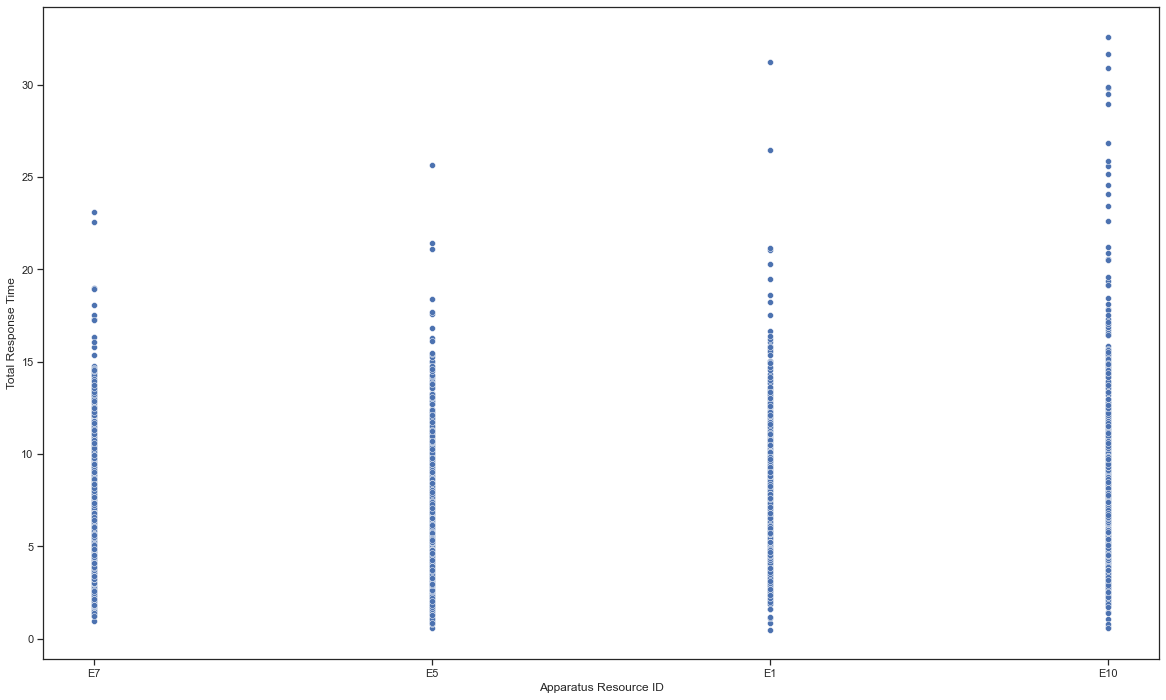

In [102]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=df_engine['Apparatus Resource ID'], y = df_engine['Total Response Time'])

<AxesSubplot:xlabel='Apparatus Resource ID', ylabel='Total Response Time'>

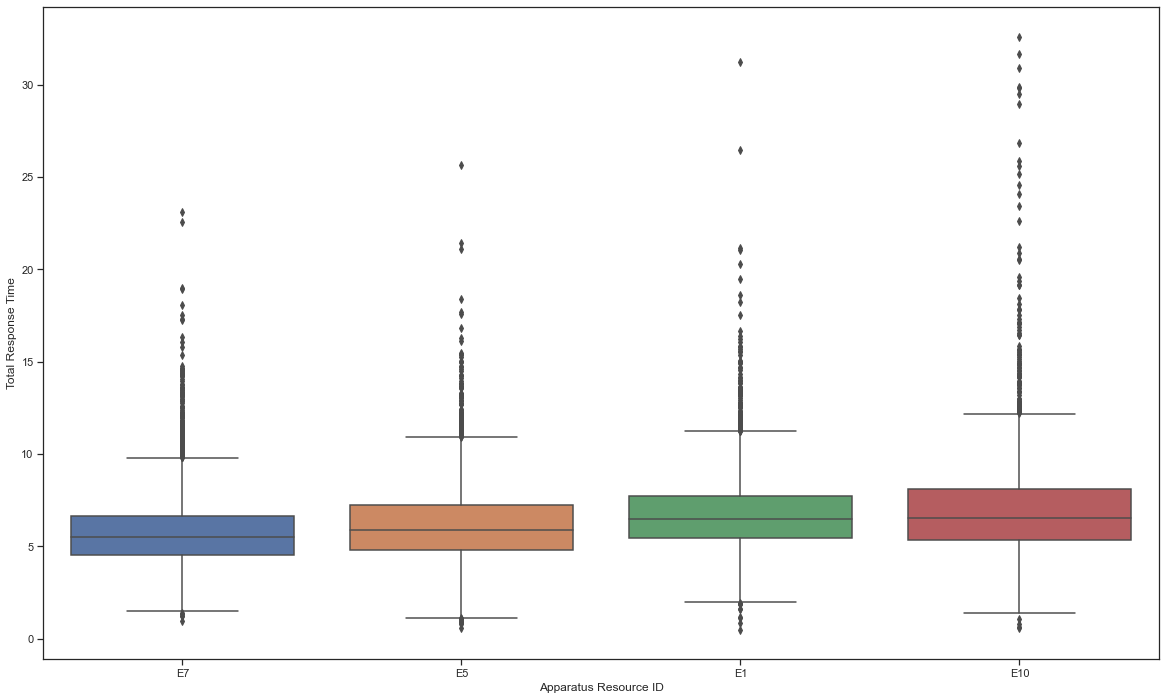

In [103]:
plt.figure(figsize=(20,12))
sns.boxplot(x=df_engine['Apparatus Resource ID'], y = df_engine['Total Response Time'])

<AxesSubplot:xlabel='Apparatus Resource ID', ylabel='Total Response Time'>

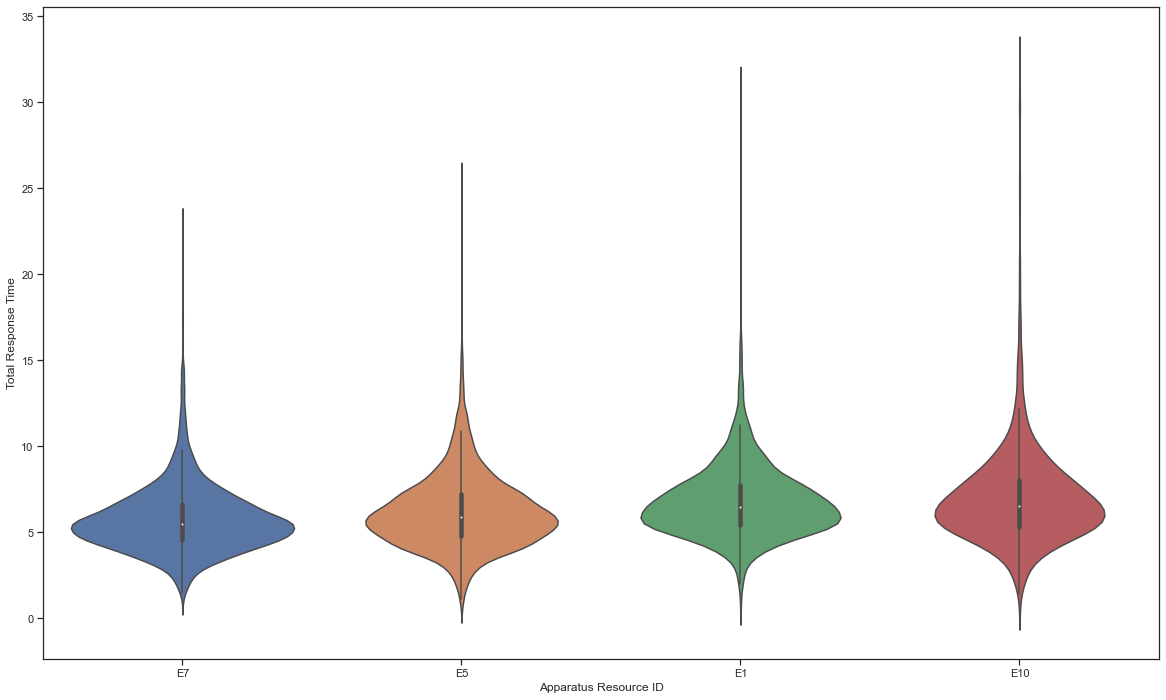

In [104]:
plt.figure(figsize=(20,12))
sns.violinplot(x=df_engine['Apparatus Resource ID'], y = df_engine['Total Response Time'])

<AxesSubplot:xlabel='Incident Date', ylabel='Total Response Time'>

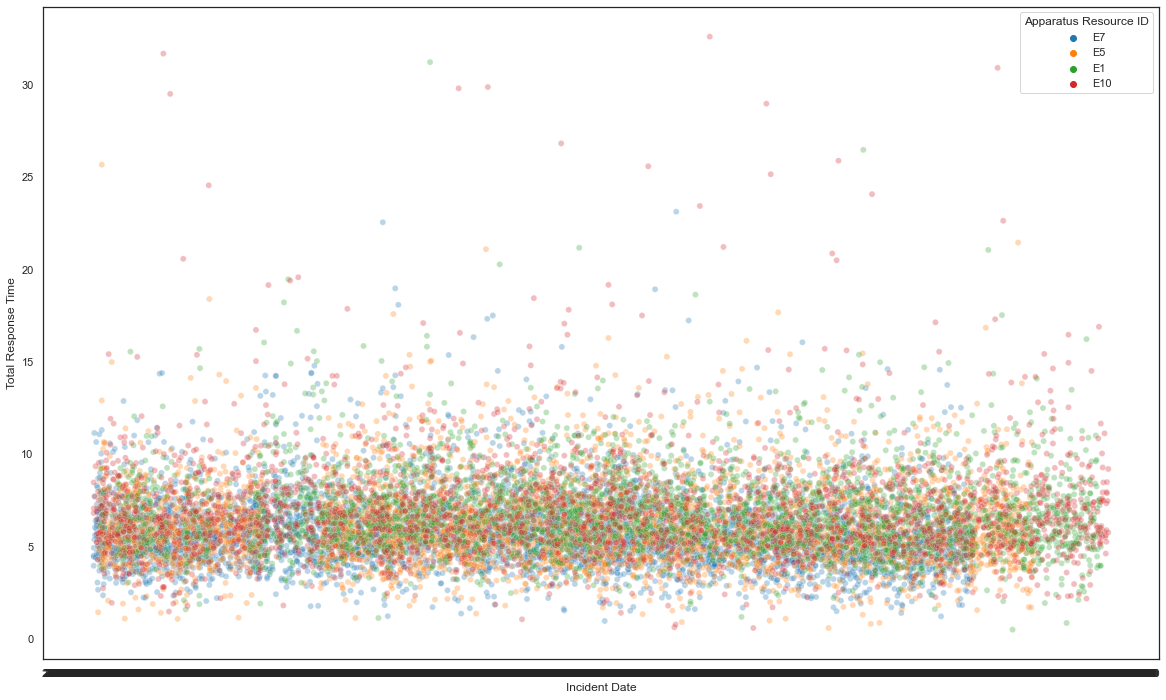

In [5]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=df_engine['Incident Date'], y = df_engine['Total Response Time'], hue =df_engine['Apparatus Resource ID'], alpha = 0.3 )

features of interest 

* 'Incident Alarm Handling Time In Minutes',
* 'Apparatus Resource Turnout Time In Minutes',
* 'Apparatus Resource En Route To Arrived In Minutes',

to predict 

'Total Response Time'

<AxesSubplot:xlabel='Apparatus Resource ID', ylabel='Incident Alarm Handling Time In Minutes'>

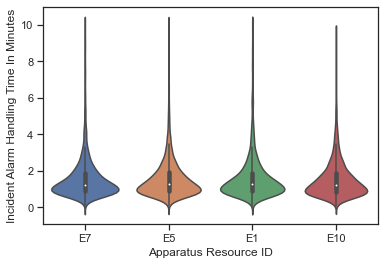

In [106]:
sns.violinplot(x=df_engine['Apparatus Resource ID'], y = df_engine['Incident Alarm Handling Time In Minutes'])

<AxesSubplot:xlabel='Apparatus Resource ID', ylabel='Apparatus Resource Turnout Time In Minutes'>

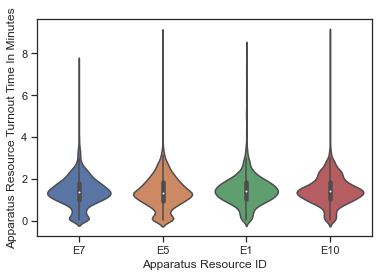

In [107]:
sns.violinplot(x=df_engine['Apparatus Resource ID'], y = df_engine['Apparatus Resource Turnout Time In Minutes'])

<AxesSubplot:xlabel='Apparatus Resource ID', ylabel='Apparatus Resource En Route To Arrived In Minutes'>

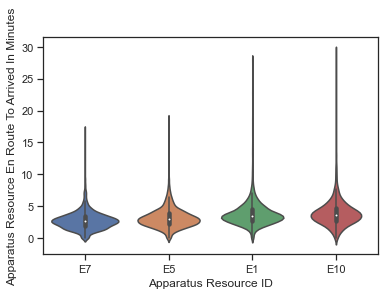

In [108]:
sns.violinplot(x=df_engine['Apparatus Resource ID'], y = df_engine['Apparatus Resource En Route To Arrived In Minutes'])

In [110]:
# num_apparatus = float(num_apparatus)

In [111]:
# type(num_apparatus)

In [43]:
apparatus = df_engine['engine_index']
apparatus

0        0
1        0
2        0
3        0
4        0
        ..
14387    3
14388    3
14389    3
14390    3
14391    3
Name: engine_index, Length: 14392, dtype: int64

In [49]:
num_apparatus = len(apparatus.unique())
num_apparatus

4

In [67]:
df_feat_ind = df_engine[['Incident Alarm Handling Time In Minutes', 'Apparatus Resource Turnout Time In Minutes','Apparatus Resource En Route To Arrived In Minutes', 'Total Response Time']]
df_feat_ind

,Incident Alarm Handling Time In Minutes,Apparatus Resource Turnout Time In Minutes,Apparatus Resource En Route To Arrived In Minutes,Total Response Time
0,1.38,1.40,1.17,3.95
1,1.52,1.33,1.58,4.43
2,1.33,1.27,2.32,4.92
3,1.13,1.03,2.33,4.49
4,1.05,1.67,2.65,5.37
...,...,...,...,...
14387,0.98,1.48,3.33,5.79
14388,1.07,0.35,3.63,5.05
14389,0.78,1.33,3.30,5.41
14390,0.48,1.27,2.78,4.53


In [68]:
df_feat_ind.describe()

,Incident Alarm Handling Time In Minutes,Apparatus Resource Turnout Time In Minutes,Apparatus Resource En Route To Arrived In Minutes,Total Response Time
count,14392.000000,14392.000000,14392.000000,14392.000000
mean,1.588214,1.417128,3.342638,6.347979
std,1.131480,0.728287,1.832831,2.310294
min,0.050000,0.020000,0.020000,0.490000
25%,0.880000,1.000000,2.270000,4.930000
50%,1.270000,1.380000,3.100000,5.990000
75%,1.880000,1.820000,4.050000,7.350000
max,10.000000,8.880000,29.000000,32.600000


In [70]:
alarm_mu = df_feat_ind['Incident Alarm Handling Time In Minutes'].mean()
alarm_std = df_feat_ind['Incident Alarm Handling Time In Minutes'].std()
alarm_std

1.1314803971157266

In [71]:
turnout_mu = df_feat_ind['Apparatus Resource Turnout Time In Minutes'].mean()
turnout_std = df_feat_ind['Apparatus Resource Turnout Time In Minutes'].std()


In [72]:
enroute_mu = df_feat_ind['Apparatus Resource En Route To Arrived In Minutes'].mean()
enroute_std = df_feat_ind['Apparatus Resource En Route To Arrived In Minutes'].std()

In [73]:
enroute_std*1.5

2.749246577240813

In [155]:
alarm = df_engine['Incident Alarm Handling Time In Minutes']
# alarm = alarm.astype('int')
alarm

0        1.38
1        1.52
2        1.33
3        1.13
4        1.05
         ... 
14387    0.98
14388    1.07
14389    0.78
14390    0.48
14391    0.68
Name: Incident Alarm Handling Time In Minutes, Length: 14392, dtype: float64

In [156]:
turnout = df_engine['Apparatus Resource Turnout Time In Minutes']
# turnout = turnout.astype('int')
turnout

0        1.40
1        1.33
2        1.27
3        1.03
4        1.67
         ... 
14387    1.48
14388    0.35
14389    1.33
14390    1.27
14391    0.95
Name: Apparatus Resource Turnout Time In Minutes, Length: 14392, dtype: float64

In [157]:
enroute = df_engine['Apparatus Resource En Route To Arrived In Minutes']
# enroute = enroute.astype('int')
enroute

0        1.17
1        1.58
2        2.32
3        2.33
4        2.65
         ... 
14387    3.33
14388    3.63
14389    3.30
14390    2.78
14391    0.88
Name: Apparatus Resource En Route To Arrived In Minutes, Length: 14392, dtype: float64

In [158]:
response_time = df_engine['Total Response Time']
# response_time = response_time.astype('int')
response_time

0        3.95
1        4.43
2        4.92
3        4.49
4        5.37
         ... 
14387    5.79
14388    5.05
14389    5.41
14390    4.53
14391    2.51
Name: Total Response Time, Length: 14392, dtype: float64

In [83]:
help(pm.Gamma)

Help on class Gamma in module pymc3.distributions.continuous:

class Gamma(PositiveContinuous)
 |  Gamma(name, *args, **kwargs)
 |  
 |  Gamma log-likelihood.
 |  
 |  Represents the sum of alpha exponentially distributed random variables,
 |  each of which has mean beta.
 |  
 |  The pdf of this distribution is
 |  
 |  .. math::
 |  
 |     f(x \mid \alpha, \beta) =
 |         \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      plt.style.use('seaborn-darkgrid')
 |      x = np.linspace(0, 20, 200)
 |      alphas = [1., 2., 3., 7.5]
 |      betas = [.5, .5, 1., 1.]
 |      for a, b in zip(alphas, betas):
 |          pdf = st.gamma.pdf(x, a, scale=1.0/b)
 |          plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
 |      plt.xlabel('x', fontsize=12)
 |      plt.ylabel('f(x)', fontsize=12)
 |      plt.legend(loc=1)
 |      plt.s

In [147]:
with pm.Model() as hierarchical_model:
    
    # Thanks to Prof. Henry's OH
    # Priors for the fixed effects
    
    # overall intercept for Incident Alarm Handling Time In Minutes 
    mu_a = pm.Gamma('mu_a', alpha = 2, beta = 3)
#     mu_a = pm.Normal('mu_a', mu=alarm_mu, sd=alarm_std) #mu is mean of our normal that we are using as the prior.  To make it non informative we have a mean of zero and a large standard deviation to make it "flat-ish"
    sigma_a = pm.HalfCauchy('sigma_a', 3) #was 5, picked 3 because of typical six sigma evaluation.  The Cauchy is the positive half the normal curve, so we only need 3 standard deviations
    
    #b - overall effect for Apparatus Resource Turnout Time In Minutes
    mu_b = pm.Gamma('mu_b', alpha = 2, beta = 4)
#     mu_b = pm.Normal('mu_b', mu=turnout_mu, sd=turnout_std) #same as above, for same reasons
    sigma_b = pm.HalfCauchy('sigma_b', 1) #was 5, same as above, for same reasons 
    
#     #c - overall effect for Apparatus Resource En Route To Arrived In Minutes
    mu_c = pm.Gamma('mu_c', alpha = 2, beta = 5)
#     mu_c = pm.Normal('mu_c', mu=enroute_mu, sd=enroute_std) #same as above, for same reasons
    sigma_c = pm.HalfCauchy('sigma_c', 1) #was 5, same as above, for same reasons 

#     #overall intercept for con
#     mu_c = pm.Normal('mu_c', mu=0., sd=1e5)
#     # no need to use sigma as this value is a defined constant per store

#     #b - overall intercept for neur
#     mu_d = pm.Normal('mu_d', mu=0., sd=1e5)
#     # no need to use sigma as this value is a defined constant per store
    
#     # extra effects of con*food and neur*food
#     mu_e = pm.Normal('mu_e', mu=0., sd=1e5) #con*food
#     mu_f = pm.Normal('mu_f', mu=0., sd=1e5) #neur*food
        
    # Random intercepts as offsets 
    # from alarms time
    a_offset = pm.Normal('a_offset', mu=alarm_mu, sd=alarm_std, shape=num_apparatus) # same mean of zero, but standard deviation of one because we are using this to normalize the offsets
    a = pm.Deterministic("a", mu_a + a_offset * sigma_a) # the beta value that we'll be using in the regression.  Deterministic declares that its is a function of other parameters
    
#     from turnout time
    b_offset = pm.Normal('b_offset', mu=turnout_mu, sd=turnout_std, shape=num_apparatus)
    b = pm.Deterministic("b", mu_b + b_offset * sigma_b)
    
    # from enroute time
    c_offset = pm.Normal('c_offset', mu=enroute_mu, sd=enroute_std, shape=num_apparatus)
    c = pm.Deterministic("c", mu_b + b_offset * sigma_b)
    
    # Thanks to Alex for this sugeston via Prof. Henry
    # this is used to isolate the effect of the store from the con and neur.  I don't fully understand how, but it does.  I wish I knew more about that kind of statistics.
#     sales_data = pm.Deterministic("sales_data", a + b)
    
    # create regression to predict sales from coffee, coffee + food, con, neur, effect of con on food, and effect of neur on food.
    
    y_hat = a[apparatus]*alarm + b[apparatus]*turnout + c[apparatus]*enroute 
    
#     y_hat = alarm + #b[turnout] + c[enroute]
    
    # Residual Error - we are doing a regression, there will be an error.
    sigma_y = pm.HalfCauchy('sigma_y', 1) # 3 standard deviation as above.

    # Data likelihood
    # our final distribution to put a tolerance on the regression results
    y_like = pm.Gamma('y_like', alpha = y_hat, beta=sigma_y, observed=response_time) #alpha = y_hat, beta=sigma_y,
#     y_like = pm.Normal('y_like', mu=y_hat, sd=sigma_y, observed=response_time)

In [150]:
with hierarchical_model:
    hierarchical_trace = pm.sample(500, n_init=50000, tune=500) #standard values from exemplar code (1000, n_init=50000, tune=1000)

<ipython-input-150-00b2584febb6>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace = pm.sample(500, n_init=50000, tune=500) #standard values from exemplar code (1000, n_init=50000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_y, c_offset, b_offset, a_offset, sigma_c, mu_c, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 963 seconds.
There were 450 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1410725927632176, but should be close to 0.8. Try to increase the number of tuning steps.
There were 375 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.29817016137546987, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 420 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.19856623071316895, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not

C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\stats\density_utils.py:620: RuntimeWarning: invalid value encountered in double_scalars
  x_std = (((x ** 2).sum() / x_len) - (x.sum() / x_len) ** 2) ** 0.5
C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\stats\density_utils.py:770: UserWarning: Something failed when estimating the bandwidth. Please check your data
  warnings.warn("Something failed when estimating the bandwidth. Please check your data")
C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\stats\density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0

array([[<AxesSubplot:title={'center':'a_offset'}>,
        <AxesSubplot:title={'center':'a_offset'}>],
       [<AxesSubplot:title={'center':'b_offset'}>,
        <AxesSubplot:title={'center':'b_offset'}>],
       [<AxesSubplot:title={'center':'c_offset'}>,
        <AxesSubplot:title={'center':'c_offset'}>],
       [<AxesSubplot:title={'center':'mu_a'}>,
        <AxesSubplot:title={'center':'mu_a'}>],
       [<AxesSubplot:title={'center':'sigma_a'}>,
        <AxesSubplot:title={'center':'sigma_a'}>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}>],
       [<AxesSubplot:title={'center':'sigma_b'}>,
        <AxesSubplot:title={'center':'sigma_b'}>],
       [<AxesSubplot:title={'center':'mu_c'}>,
        <AxesSubplot:title={'center':'mu_c'}>],
       [<AxesSubplot:title={'center':'sigma_c'}>,
        <AxesSubplot:title={'center':'sigma_c'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesS

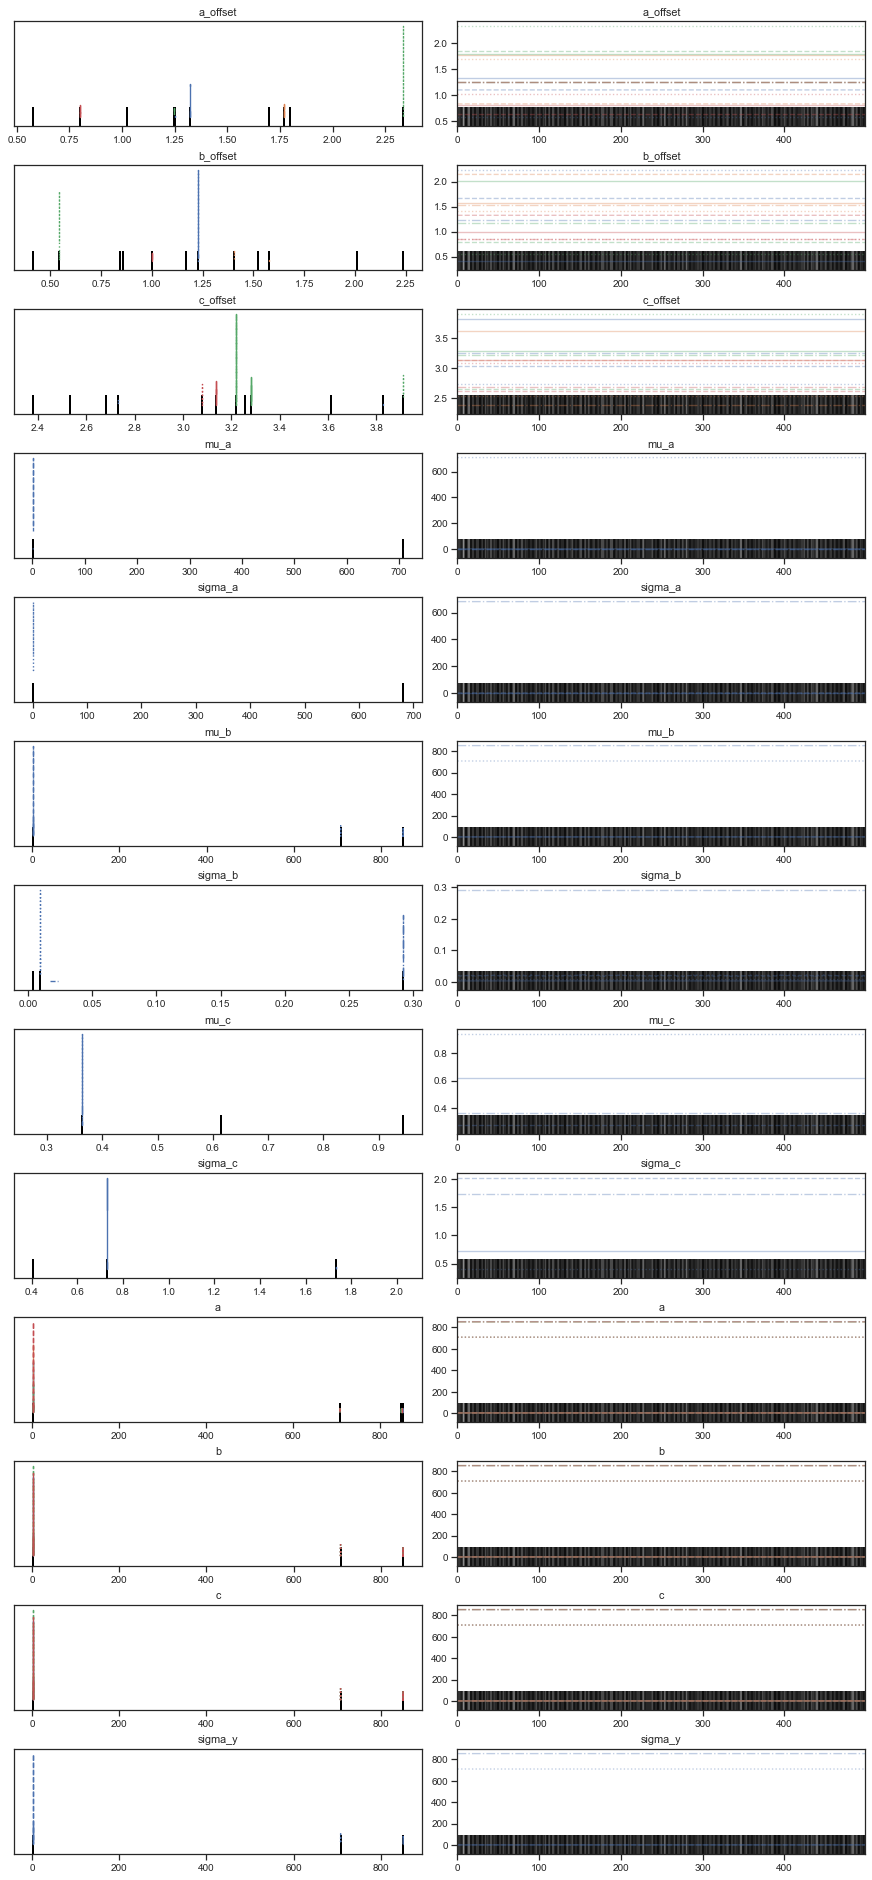

In [151]:
pm.plot_trace(hierarchical_trace)

In [ ]:
summary = pm.summary(hierarchical_trace)
summary

In [152]:
with pm.Model() as hierarchical_model:
    
    # Thanks to Prof. Henry's OH
    # Priors for the fixed effects
    
    # overall intercept for Incident Alarm Handling Time In Minutes 
#     mu_a = pm.Gamma('mu_a', alpha = 2, beta = 3)
    mu_a = pm.Normal('mu_a', mu=alarm_mu, sd=1) #mu is mean of our normal that we are using as the prior.  To make it non informative we have a mean of zero and a large standard deviation to make it "flat-ish"
    sigma_a = pm.HalfCauchy('sigma_a', 3) #was 5, picked 3 because of typical six sigma evaluation.  The Cauchy is the positive half the normal curve, so we only need 3 standard deviations
    
    #b - overall effect for Apparatus Resource Turnout Time In Minutes
#     mu_b = pm.Gamma('mu_b', alpha = 2, beta = 4)
    mu_b = pm.Normal('mu_b', mu=turnout_mu, sd=1) #same as above, for same reasons
    sigma_b = pm.HalfCauchy('sigma_b', 1) #was 5, same as above, for same reasons 
    
#     #c - overall effect for Apparatus Resource En Route To Arrived In Minutes
#     mu_c = pm.Gamma('mu_c', alpha = 2, beta = 5)
    mu_c = pm.Normal('mu_c', mu=enroute_mu, sd=1) #same as above, for same reasons
    sigma_c = pm.HalfCauchy('sigma_c', 1) #was 5, same as above, for same reasons 

#     #overall intercept for con
#     mu_c = pm.Normal('mu_c', mu=0., sd=1e5)
#     # no need to use sigma as this value is a defined constant per store

#     #b - overall intercept for neur
#     mu_d = pm.Normal('mu_d', mu=0., sd=1e5)
#     # no need to use sigma as this value is a defined constant per store
    
#     # extra effects of con*food and neur*food
#     mu_e = pm.Normal('mu_e', mu=0., sd=1e5) #con*food
#     mu_f = pm.Normal('mu_f', mu=0., sd=1e5) #neur*food
        
    # Random intercepts as offsets 
    # from alarms time
    a_offset = pm.Normal('a_offset', mu=alarm_mu, sd=alarm_std, shape=num_apparatus) # same mean of zero, but standard deviation of one because we are using this to normalize the offsets
    a = pm.Deterministic("a", mu_a + a_offset * sigma_a) # the beta value that we'll be using in the regression.  Deterministic declares that its is a function of other parameters
    
#     from turnout time
    b_offset = pm.Normal('b_offset', mu=turnout_mu, sd=turnout_std, shape=num_apparatus)
    b = pm.Deterministic("b", mu_b + b_offset * sigma_b)
    
    # from enroute time
    c_offset = pm.Normal('c_offset', mu=enroute_mu, sd=enroute_std, shape=num_apparatus)
    c = pm.Deterministic("c", mu_b + b_offset * sigma_b)
    
    # Thanks to Alex for this sugeston via Prof. Henry
    # this is used to isolate the effect of the store from the con and neur.  I don't fully understand how, but it does.  I wish I knew more about that kind of statistics.
#     sales_data = pm.Deterministic("sales_data", a + b)
    
    # create regression to predict sales from coffee, coffee + food, con, neur, effect of con on food, and effect of neur on food.
    
    y_hat = a[apparatus]*alarm + b[apparatus]*turnout + c[apparatus]*enroute 
    
#     y_hat = alarm + #b[turnout] + c[enroute]
    
    # Residual Error - we are doing a regression, there will be an error.
    sigma_y = pm.HalfCauchy('sigma_y', 1) # 3 standard deviation as above.

    # Data likelihood
    # our final distribution to put a tolerance on the regression results
#     y_like = pm.Gamma('y_like', alpha = y_hat, beta=sigma_y, observed=response_time) #alpha = y_hat, beta=sigma_y,
    y_like = pm.Normal('y_like', mu=y_hat, sd=sigma_y, observed=response_time)

In [153]:
with hierarchical_model:
    hierarchical_trace = pm.sample(200, n_init=1000, tune=200) #standard values from exemplar code (1000, n_init=50000, tune=1000)

<ipython-input-153-4d5d290dc53f>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace = pm.sample(200, n_init=1000, tune=200) #standard values from exemplar code (1000, n_init=50000, tune=1000)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_y, c_offset, b_offset, a_offset, sigma_c, mu_c, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains for 200 tune and 200 draw iterations (800 + 800 draws total) took 19 seconds.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
There were 35 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic i

C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\stats\density_utils.py:620: RuntimeWarning: invalid value encountered in double_scalars
  x_std = (((x ** 2).sum() / x_len) - (x.sum() / x_len) ** 2) ** 0.5
C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\stats\density_utils.py:770: UserWarning: Something failed when estimating the bandwidth. Please check your data
  warnings.warn("Something failed when estimating the bandwidth. Please check your data")
C:\Users\edwar\anaconda3\envs\pm3env\lib\site-packages\arviz\stats\density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0

array([[<AxesSubplot:title={'center':'mu_a'}>,
        <AxesSubplot:title={'center':'mu_a'}>],
       [<AxesSubplot:title={'center':'mu_b'}>,
        <AxesSubplot:title={'center':'mu_b'}>],
       [<AxesSubplot:title={'center':'mu_c'}>,
        <AxesSubplot:title={'center':'mu_c'}>],
       [<AxesSubplot:title={'center':'a_offset'}>,
        <AxesSubplot:title={'center':'a_offset'}>],
       [<AxesSubplot:title={'center':'b_offset'}>,
        <AxesSubplot:title={'center':'b_offset'}>],
       [<AxesSubplot:title={'center':'c_offset'}>,
        <AxesSubplot:title={'center':'c_offset'}>],
       [<AxesSubplot:title={'center':'sigma_a'}>,
        <AxesSubplot:title={'center':'sigma_a'}>],
       [<AxesSubplot:title={'center':'sigma_b'}>,
        <AxesSubplot:title={'center':'sigma_b'}>],
       [<AxesSubplot:title={'center':'sigma_c'}>,
        <AxesSubplot:title={'center':'sigma_c'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesS

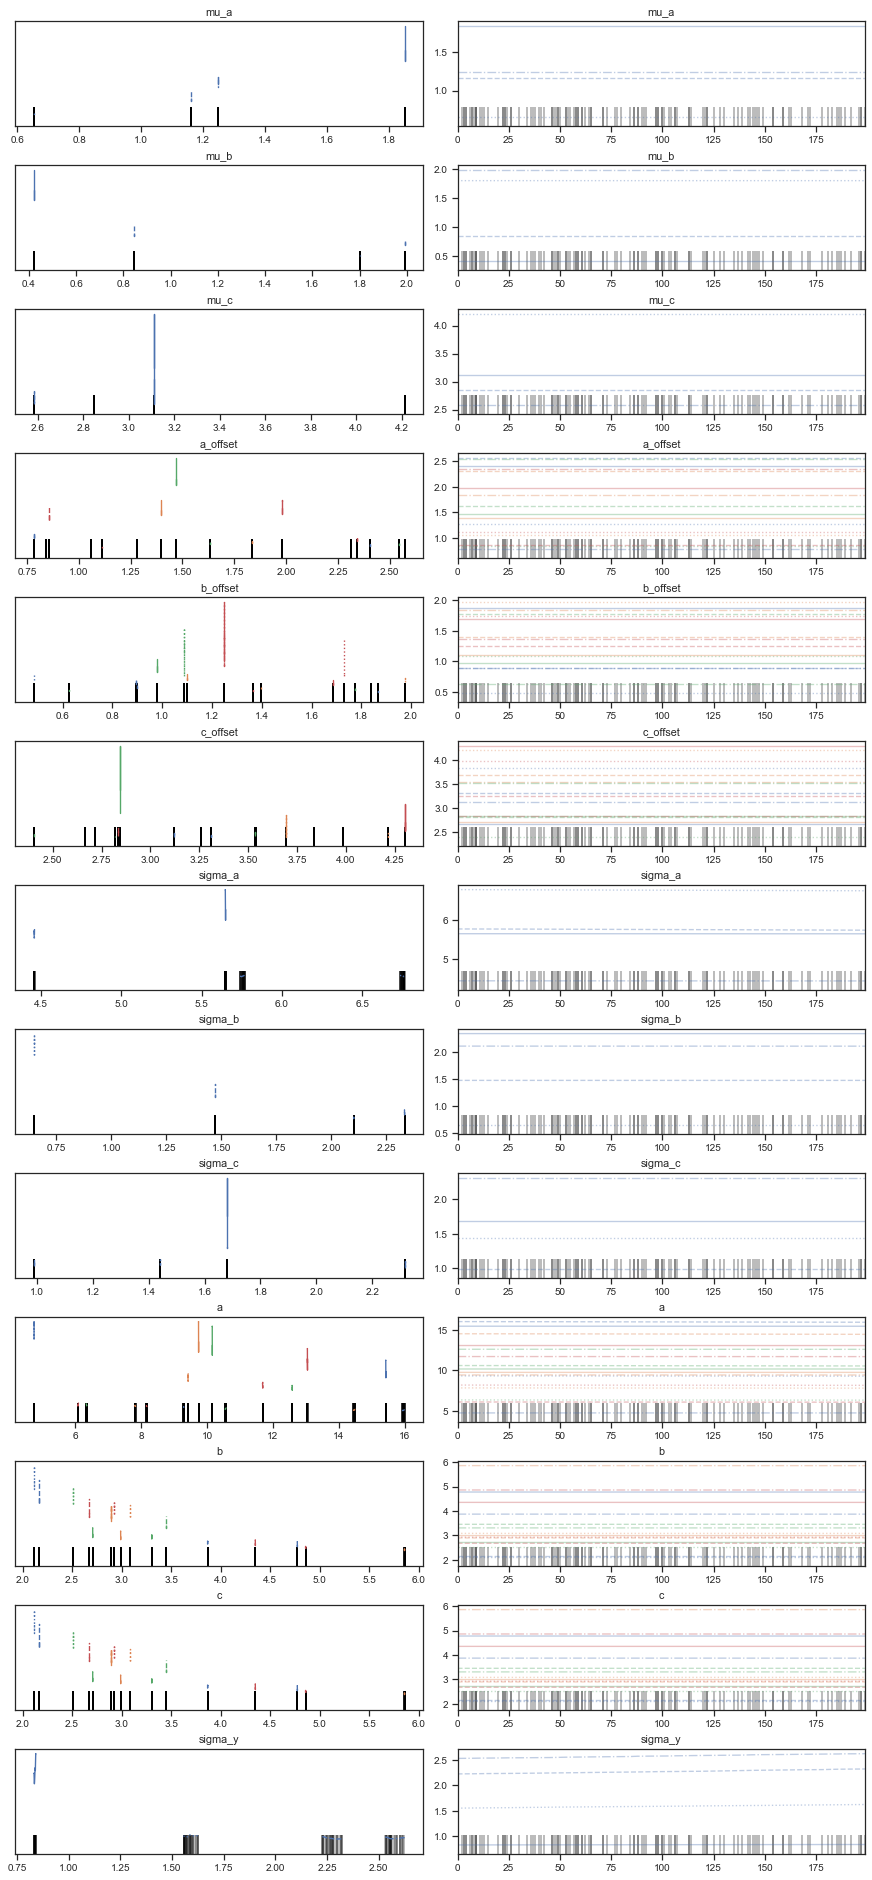

In [154]:
pm.plot_trace(hierarchical_trace)

In [ ]:
ems_list = ['Provide first aid & check for injuries', 
            'Provide basic life support (BLS)', 
            'Provide advanced life support (ALS)', 
            'Transport person', 
            'Emergency medical services, other', 
            'Assistance, other'] 
ems_list

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df, x='Incident Date', hue='Incident Primary Action Taken', stat='count', bins = 54, shrink=.8).set(title = "Charlottesville Fire/EMS by Type, binned by year and month") #, hue="FireType", 

plt.show


In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")
sns.color_palette("bright")

sns.histplot(data=ems_df, x='year', hue='Incident Primary Action Taken', shrink=0.8, bins = 5).set(title = "Charlottesville Fire/EMS by Type by Year") #bins = years, hue="FireType", 

plt.show
#plt.savefig('CFD_Year_Plot.png')a

In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df, x='Incident Date', hue='Basic Shift Or Platoon', stat='count', bins = 54, shrink=.8).set(title = "Charlottesville Fire/EMS by Shift") #, hue="FireType", 

plt.show


In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df, x='Incident Date', hue='Apparatus Resource Primary Action Taken Code And Description', stat='count', bins = 54, shrink=.8).set(title = "Charlottesville Fire/EMS") #, hue="FireType", 

plt.show


In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df, x='Incident Date', hue='Apparatus Resource Type', stat='count', bins = 54, shrink=.8).set(title = "Charlottesville Fire/EMS") #, hue="FireType", 

plt.show



In [ ]:
plt.figure(figsize=(20,12))
sns.set(style="ticks")

#bin 54 = 4.5 years

sns.histplot(data=ems_df, x='Incident Date', hue='Basic Incident Zone/District Number', stat='count', bins = 54, shrink=.8).set(title = "Charlottesville Fire/EMS") #, hue="FireType", 

plt.show


In [ ]:
ems_df[['year', 'Incident Primary Action Taken']].value_counts(['year', 'Incident Primary Action Taken']).to_frame()


In [ ]:
ems_df[['year', 'Incident Primary Action Taken']].value_counts(['year', 'Incident Primary Action Taken']).sort_index().to_frame()


In [ ]:
ems_df.groupby(['year', 'Incident Primary Action Taken']).size().unstack()


In [ ]:
# for name, group in ems_df.groupby('year'):
#     print(name)
#     print(group)

In [ ]:
ems_df[['year', 'Basic Shift Or Platoon']].value_counts(['year', 'Basic Shift Or Platoon']).sort_index().to_frame()

In [ ]:
ems_df.groupby(['year', 'Basic Shift Or Platoon']).size().unstack()

In [ ]:
ems_df[['year', 'Apparatus Resource Type']].value_counts(['year', 'Apparatus Resource Type']).sort_index().to_frame()

In [ ]:
ems_df.groupby(['year', 'Apparatus Resource Type']).size().unstack()

In [ ]:
ems_df[['year', 'Basic Incident Zone/District Number']].value_counts(['year', 'Basic Incident Zone/District Number']).sort_index().to_frame()


In [ ]:
ems_df.groupby(['year', 'Basic Incident Zone/District Number']).size().unstack()

In [ ]:
df.info()

In [ ]:
ems_df.info()

In [ ]:
import geopandas as gpd


In [ ]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [ ]:
# import fiona; help(fiona.open)

In [ ]:
cville = gpd.read_file('doc.kml', driver = 'KML')
cville

In [ ]:
import matplotlib.pyplot as plt
cville.plot()

In [ ]:
cville[['Description', 'geometry']][cville['Name'] == 'UVA']
# cville.ix[polys['Name']=='Eteläinen']

In [ ]:
cville_poly = cville[['Description', 'geometry']][cville['Name'] == 'UVA'].copy

In [ ]:
cville_poly.plot()

In [ ]:
neigherborhood_list = cville.Name.to_list()

In [ ]:
neigherborhood_list

In [ ]:
for h in neigherborhood_list:
    df[h] = np.NaN

In [ ]:
df.head()

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Basic Incident Geocoded Latitude'], df['Basic Incident Geocoded Longitude']))

In [ ]:
gdf.head(2)

In [ ]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = cville.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

we must have a data problem with the points.  something is out of wack

In [ ]:
boundary_list = cville.geometry.to_list()

In [ ]:
#zip the lists together to make a dictionary
boundary_dict = dict(zip(neigherborhood_list, boundary_list))

#had to go back and look at notebooks from Tashmans's 5100 dogfooding
#make sure its right
for k, v in boundary_dict.items():
    print("Neigherborhood Names :", k)
#     print("Geometry:", v)
    print("-"*40)

In [ ]:
ems_df[['Basic Incident Geocoded Latitude', 'Basic Incident Geocoded Longitude']]

In [ ]:
from shapely.geometry import Point, Polygon

In [ ]:
lat1 = ems_df['Basic Incident Geocoded Latitude'].iloc[0]

In [ ]:
lat1

In [ ]:
lon1 = ems_df['Basic Incident Geocoded Longitude'].iloc[0]
lon1

In [ ]:
p1 = Point(ems_df['Basic Incident Geocoded Latitude'].iloc[0], ems_df['Basic Incident Geocoded Longitude'].iloc[0])

In [ ]:
p1

In [ ]:
UVA_cord = cville[['geometry']][cville['Name'] == 'UVA']
UVA_cord

In [ ]:
cord2 = UVA_cord.iloc[0]['geometry']

In [ ]:
cord2

In [ ]:
cord2.contains(p1)

In [ ]:
p1

In [ ]:
cville.contains(p1)

In [ ]:
for k, v in boundary_dict.items():
#     print(k)
    cord = v
#     print(cord)
    if p1.within(cord):
        print (k)
#     else:
#         print('Point not in Neigherborhood')
    

In [ ]:
# uva = cville.geometry[cville['Name'] == 'UVA']
# uva.reset_index(drop=True, inplace=True)
# fig, ax = plt.subplots()

# cville_poly.plot(ax=ax, facecolor='gray');

# uva.plot(ax=ax, facecolor='red');

# # data.plot(ax=ax, color='blue', markersize=5);

# # plt.tight_layout();

In [ ]:
southern = cville.ix[polys['Name']=='Eteläinen']

southern.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray');

southern.plot(ax=ax, facecolor='red');

data.plot(ax=ax, color='blue', markersize=5);

plt.tight_layout();